In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\manas\OneDrive\Desktop\ML Projects\Placement Predictor\placement.csv")

In [3]:
df = df.iloc[:,1:] #all rows and columns 1 onwards

In [4]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [5]:
# steps:

# 1. Proprocess + EDA(Explorative Data Analysis) + Feature Selection(we will use all features in this)
# 2. Extract input and output cols
# 3. Scale the values (get the values into a range of -1 and 1 for easier calculations)
# 4. Train test split (Cross-split)
# 5. Train the model
# 6. Evalueate the model/model selection (sometimes we use multiple algorithm and then assess and choose the best one)
# 7. Deploy the model (Integration with website and deployment)

In [6]:
df.info()  #gives information about every column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [7]:
# EDA
import matplotlib.pyplot as plt

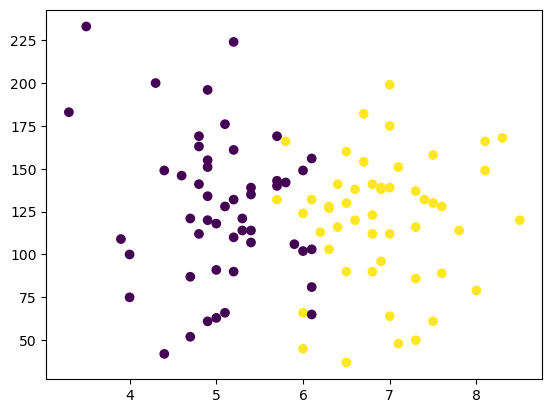

In [8]:
plt.scatter(df['cgpa'],df['iq'], c=df['placement']) #yellow not placed, blue placed

In [9]:
# We will use logistic regression
# placement is dependent variable

In [10]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1] # last column can also be written as [:,3]

In [11]:
X #2D tensor

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [12]:
from sklearn.model_selection import train_test_split #first we are splitting the data
# scaling and splitting can be done in any order

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size = 0.1) 
#arguments are supposed to be dependent variable, independent variable and then percentage of data 
#to keep as testing data
#its given in order of x_train,x_test, y_train, y_test. So we will store accordingly

In [14]:
# scale
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler() #making an object

In [16]:
X_train = scaler.fit_transform(X_train)

array([[-4.99381111e-01, -3.99371224e-01],
       [-9.45257104e-01,  7.92123036e-01],
       [-1.03443230e+00,  9.90705412e-01],
       [ 7.49071667e-01, -2.20647085e-03],
       [ 9.27422064e-01,  1.28857898e+00],
       [-4.99381111e-01, -2.25611645e-01],
       [-9.45257104e-01,  2.70844297e-01],
       [ 9.27422064e-01, -1.46675150e+00],
       [-1.12360750e+00, -8.95827166e-01],
       [ 3.03195675e-01,  1.21907515e-01],
       [-6.77731508e-01, -8.21358774e-01],
       [ 3.56700794e-02, -1.93838464e+00],
       [ 3.03195675e-01,  9.70847175e-02],
       [ 9.27422064e-01,  3.94958282e-01],
       [-1.74783389e+00, -1.19370073e+00],
       [ 4.81546072e-01, -8.21358774e-01],
       [-2.37206028e+00,  1.48716135e+00],
       [ 1.37329806e+00,  1.71553109e-01],
       [-1.12360750e+00, -1.76462506e+00],
       [ 9.27422064e-01,  1.88432611e+00],
       [-8.56081905e-01, -7.96535977e-01],
       [ 1.19494766e+00, -9.20649963e-01],
       [ 3.92370873e-01, -1.75966050e-01],
       [ 2.

In [17]:
X_test = scaler.transform(X_test)
X_test

array([[-1.2127827 ,  0.56871786],
       [ 0.03567008,  0.64318625],
       [ 1.64082365, -0.22561164],
       [ 0.03567008,  0.02261633],
       [ 1.19494766, -0.17596605],
       [ 1.90834925,  0.64318625],
       [-0.76690671, -1.4171059 ],
       [-1.48030829,  1.9091489 ],
       [ 0.57072127, -0.07667486],
       [ 0.83824687, -0.67242199]])

In [18]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [19]:
# model training provide training dataset as arguments
clf.fit(X_train,Y_train)

LogisticRegression()

In [28]:
y_predict = clf.predict(X_test)

In [24]:
Y_test

39    0
33    0
55    1
27    1
72    1
37    1
9     0
95    0
20    1
66    1
Name: placement, dtype: int64

In [29]:
# check accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_predict)

1.0

In [36]:
#plotting the decision boundary
# it will show us what pattern did machine learning observe in our data
!pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 1.9 MB/s eta 0:00:00


<AxesSubplot:>

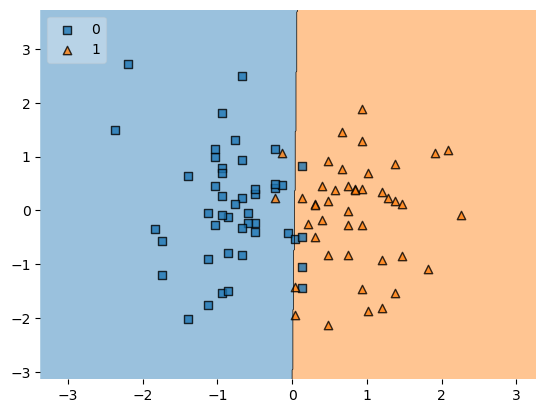

In [39]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,Y_train.values,clf = clf, legend =2)

In [40]:
import pickle
# it converts every object into a file and the file can be used in anything else as well

In [41]:
pickle.dump(clf,open('mode.pkl','wb'))

In [ ]:
# you can deploy this on heroku, aws and google platform host them for free